## Ergast Formula 1 Database

Ноутбук, посвященный гонкам Формулы-1. 

Основная его цель:
 - просто вспомнить SQL;
 - вспомнить оконные функции;
 - вспомнить, как подключаться к локальной базе;
 - вспомнить, как визуализировать "сухие" таблицы SQL средствами python.

In [1]:
import pymysql
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Подключаемся к локальной базе. Работаем через VSCode. В процессе фиксим ошибку *ER_NOT_SUPPORTED_AUTH_MODE Client*.

- Вызываем cmd в папке bin MySQL (C:\Program Files\MySQL\MySQL Server 8.3\bin) 
- CREATE USER '**sqluser**'@'%' IDENTIFIED WITH mysql_native_password BY '**password**'; 
- GRANT ALL PRIVILEGES ON *.* TO 'sqluser'@'%'; 
- FLUSH PRIVILEGES;

Если есть проблемы с pip, то: 

- cmd
- curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
- python get-pip.py
- C:\Users\usename\AppData\Local\Programs\Python\Python312\Scripts (прописываем это в Path - Переменные среды)

Подключаемся к нашей локальной базе с данными по королевским гонкам.

In [3]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="sqluser",
                       password="password",
                       database="sys",
                       charset="utf8")


sql = """
SELECT * 
  FROM circuits;
"""

df = pd.read_sql(sql, conn)
df.head(5)

C:\Temp\ipykernel_10572\857595151.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


Вроде работает. 

1. Вывести количество треков по странам

In [6]:
sql1 = """
SELECT country, COUNT(location) AS 'Количество'   
  FROM circuits
 GROUP by country
 ORDER BY 2 DESC;
 """

df = pd.read_sql(sql1, conn)
df.head(10)

C:\Temp\ipykernel_10572\1506444159.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql1, conn)


,country,Количество
0,USA,11
1,France,7
2,Spain,6
3,Italy,4
4,Portugal,4
5,UK,4
6,Japan,3
7,Belgium,3
8,Canada,3
9,Germany,3


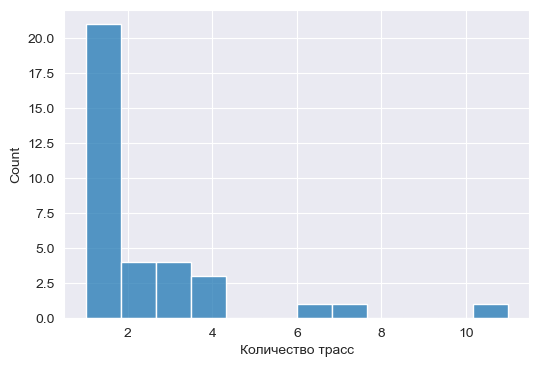

In [26]:
f, ax = plt.subplots(figsize=(6,4))
x = df['Количество']
x = pd.Series(x, name="Количество трасс")
ax = sns.histplot(x, bins=12)
plt.show()

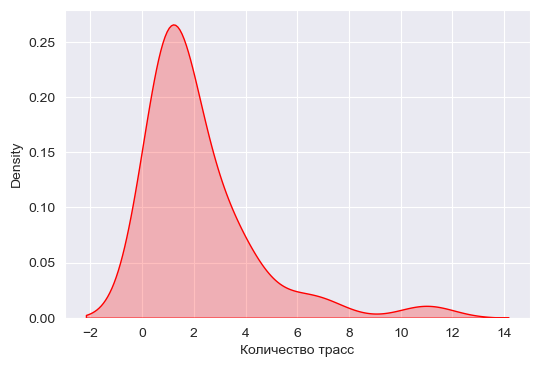

In [27]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(6,4))
x = df['Количество']
x = pd.Series(x, name="Количество трасс")
ax = sns.kdeplot(x, fill= True, color='r')
plt.show()

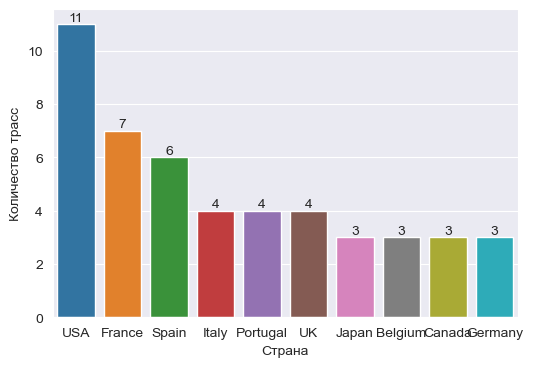

In [43]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(data=df, x=df.country[:10], y="Количество")
ax.set_xlabel('Страна', fontdict={'size': 10})
ax.set_ylabel('Количество трасс', fontdict={'size': 10})
ax.bar_label(ax.containers[0])
# for i in ax.containers:
#     ax.bar_label(i,)
plt.show()

2. Вывести кубок конструкторов за 20-23 годы. Сортировка по убыванию.



In [46]:
sql2 = """
SELECT con.name AS "Команда", 
       SUM(rc.points) AS "Очки", 
       r.year 
  FROM results rc
       INNER JOIN constructors con USING (constructorId)
             JOIN races r USING (raceId)
 WHERE r.YEAR >= 2020
 GROUP BY 1,3
 ORDER BY 3, 2 DESC;
"""

df2 = pd.read_sql(sql2, conn)
df2.head(10)

C:\Temp\ipykernel_10572\2753764389.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(sql2, conn)


,Команда,Очки,year
0,Mercedes,573.0,2020
1,Red Bull,319.0,2020
2,Racing Point,210.0,2020
3,McLaren,202.0,2020
4,Renault,181.0,2020
5,Ferrari,131.0,2020
6,AlphaTauri,107.0,2020
7,Alfa Romeo,8.0,2020
8,Haas F1 Team,3.0,2020
9,Williams,0.0,2020


In [47]:
sql3 = """
SELECT CONCAT(d.forename,' ',d.surname) AS "Pilot", COUNT(r.YEAR) AS "Количество побед"
  FROM results rc
   		INNER JOIN drivers d USING (driverId)
   		      JOIN races r USING (raceId)
 WHERE r.YEAR >= 1950 AND rc.position = 1
 GROUP BY 1
 ORDER BY 2 DESC
 LIMIT 20;
"""

df3 = pd.read_sql(sql3, conn)
df3.head(10)

C:\Temp\ipykernel_10572\2143894786.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(sql3, conn)


,Pilot,Количество побед
0,Lewis Hamilton,103
1,Michael Schumacher,91
2,Max Verstappen,54
3,Sebastian Vettel,53
4,Alain Prost,51
5,Ayrton Senna,41
6,Fernando Alonso,32
7,Nigel Mansell,31
8,Jackie Stewart,27
9,Jim Clark,25


In [4]:
sql = """
WITH cte AS(
SELECT l2.lap, 
       r2.YEAR,
       c2.name,
       time_format(SEC_TO_TIME(milliseconds/1000), '%i:%s:%f') AS "foll_time",
       LAG(time_format(SEC_TO_TIME(milliseconds/1000), '%i:%s:%f'), 1) OVER (ORDER BY l2.lap) AS "prev_time",
       milliseconds - LAG(milliseconds, 1) OVER (ORDER BY l2.lap) AS "diff",
       ROUND(AVG(milliseconds) OVER (ORDER BY l2.lap
       								  ROWS BETWEEN 1 PRECEDING 
       								  AND 2 FOLLOWING)) AS "roll_avg"
  FROM laptimes l2
       INNER JOIN races r2 USING (raceId)
       		 JOIN circuits c2 USING (circuitId)
             JOIN drivers d USING (driverId)
  WHERE c2.name = 'Albert Park Grand Prix Circuit'
    AND d.surname = 'Schumacher' 
    AND d.forename = 'Michael'
    AND r2.YEAR = 2004
ORDER BY 1 ASC
)

SELECT cte.lap, cte.name, foll_time, prev_time,
	time_format(SEC_TO_TIME(diff/1000), '%i:%s:%f') AS "Разница",
	time_format(SEC_TO_TIME(roll_avg/1000), '%i:%s:%f') AS "Скользящее"
	FROM cte;
"""
import pandas as pd
df = pd.read_sql(sql, conn)
df

C:\Temp\ipykernel_10572\3317183971.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,lap,name,foll_time,prev_time,Разница,Скользящее
0,1,Albert Park Grand Prix Circuit,01:33:122000,None,None,01:27:999000
1,2,Albert Park Grand Prix Circuit,01:25:906000,01:33:122000,-00:07:216000,01:27:127000
2,3,Albert Park Grand Prix Circuit,01:24:968000,01:25:906000,-00:00:938000,01:25:047000
3,4,Albert Park Grand Prix Circuit,01:24:513000,01:24:968000,-00:00:455000,01:24:697000
4,5,Albert Park Grand Prix Circuit,01:24:802000,01:24:513000,00:00:289000,01:24:589000
5,6,Albert Park Grand Prix Circuit,01:24:506000,01:24:802000,-00:00:296000,01:24:503000
6,7,Albert Park Grand Prix Circuit,01:24:533000,01:24:506000,00:00:027000,01:24:385000
7,8,Albert Park Grand Prix Circuit,01:24:170000,01:24:533000,-00:00:363000,01:24:342000
8,9,Albert Park Grand Prix Circuit,01:24:330000,01:24:170000,00:00:160000,01:24:291000
9,10,Albert Park Grand Prix Circuit,01:24:334000,01:24:330000,00:00:004000,01:29:600000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lap         58 non-null     int64 
 1   name        58 non-null     object
 2   foll_time   58 non-null     object
 3   prev_time   57 non-null     object
 4   Разница     57 non-null     object
 5   Скользящее  58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [24]:
df['Скользящее'] = pd.to_datetime(df['Скользящее'], format='%M:%S:%f')

In [19]:
df['Скользящее'] =df['Скользящее'].dt.strftime('%M:%S:%f')

In [22]:
df.head(5)

,lap,name,foll_time,prev_time,Разница,Скользящее
0,1,Albert Park Grand Prix Circuit,01:33:122000,None,None,01:27:999000
1,2,Albert Park Grand Prix Circuit,01:25:906000,01:33:122000,-00:07:216000,01:27:127000
2,3,Albert Park Grand Prix Circuit,01:24:968000,01:25:906000,-00:00:938000,01:25:047000
3,4,Albert Park Grand Prix Circuit,01:24:513000,01:24:968000,-00:00:455000,01:24:697000
4,5,Albert Park Grand Prix Circuit,01:24:802000,01:24:513000,00:00:289000,01:24:589000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='lap', ylabel='Скользящее'>

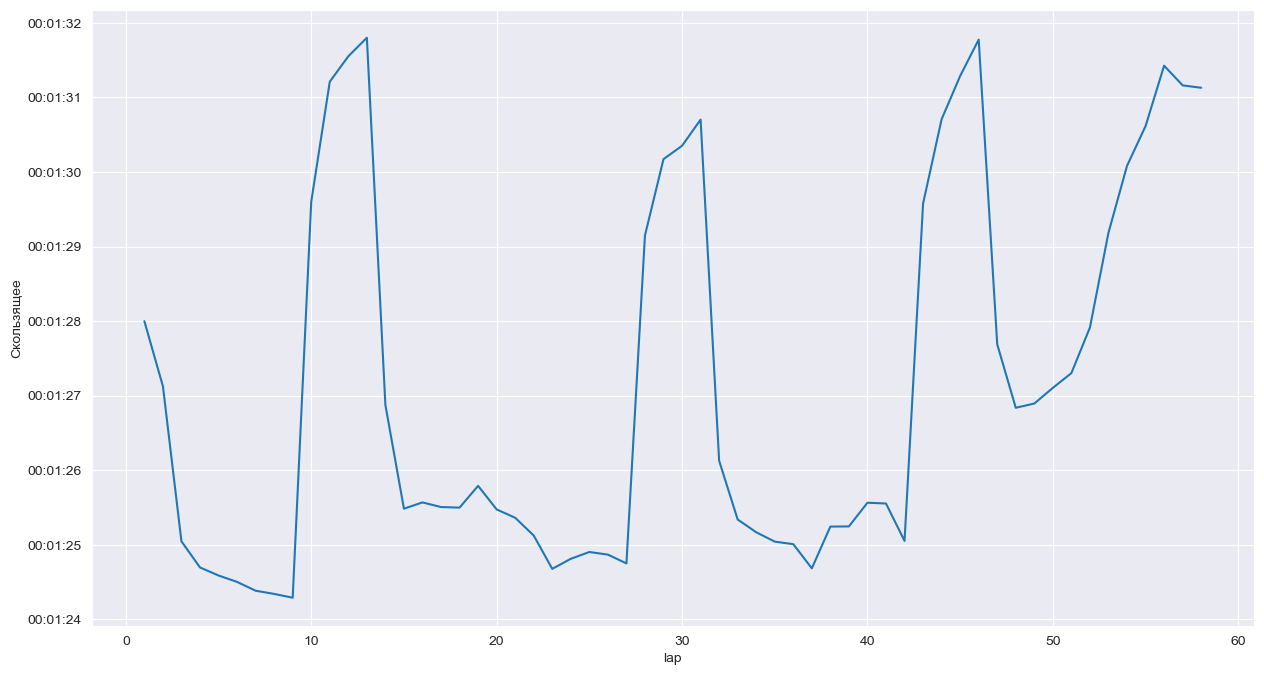

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 8))
sns.lineplot(x=df["lap"], y=df["Скользящее"], data=df)

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(modelfit_2, 0, 250, ax=ax)
    plt.plot(temper, color='red', label='Series')
    plt.legend()
    plt.show()